# Computing the overlap of Jacobian and PCA clusters of ABA

In [1]:
# Importing libraries
import numpy as np
import nibabel as nib
import os
import pandas as pd
import matplotlib.pyplot as plt
%run nifti_tools.ipynb
%matplotlib inline

In [2]:
def overlap_clusters (jac_file, cluster_file, n_clusters, plot=False):
    """
    Counts the ratio of (overlapping cluster and Jacobian)/cluster voxels,
    and returns a list of the ratios and plots the overlap ratios (optional).
    
    Args:
        jac_file (str): The path to the binary Jacobian nii file.
        cluster_file (str): The path to the Cluster nii file.
        n_clusters (int): Number of clusters in the cluster file.
        plot (bool): if set True, it will plot the overlap ratio with each cluster ID.
    
    Returns:
        overlap_list (list): The list with overlap ratios of Jacobian and clusters
    """
    
    # Loading input files
    jac_vec = nifti_to_vector(jac_file)
    cluster_vec = nifti_to_vector(cluster_file)
    
    # Creating a list to store overlap ratios
    overlap_list = []
    
    # Looping over cluster IDs to compute overlap
    for cluster_id in range(n_clusters):
        
        # Masking the cluster for the specific cluster ID
        masked_cluster = np.where(cluster_vec == cluster_id, 1, 0)
        
        # Count of voxels in the cluster
        count_cluster = np.sum(masked_cluster)
        
        # Count of overlapping voxels
        count_overlap = np.vdot(jac_vec, masked_cluster)
        
        # Computing the overlap and adding to the list
        overlap_ratio = count_overlap / count_cluster
        overlap_list.append(overlap_ratio)
    
    if plot:
        # x vector is the cluster ID
        x = range(n_clusters)
        y = overlap_list

        # Plotting the ratios
        plt.plot(x, y)

        # Naming the x-axis, y-axis and the whole graph
        plt.xlabel("Cluster ID")
        plt.ylabel("Overlap ratio")
        plt.title("Overlap of Jacobian and clusters")

        # To load the display window
        plt.show()
    
    return overlap_list

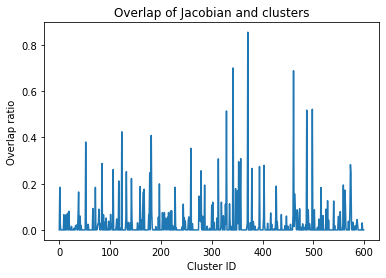

In [3]:
# Plotting the overlap of the clusters and Jacobian

# Choosing the number of clusters
n = 600

# Loading inputs to the function
jac_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_neg_ctrst_clust_binary_200.nii'

# Inputting path to the cluster file
cluster_file = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(n)+'.nii'

a = overlap_clusters (jac_file, cluster_file, n, plot=True)

In [14]:
'''
Making a dataframe that has the overlap ratios of Jacobian and clusters for clusters ranging
from 25 to 600 with a step of 25.
'''

# Inputting the min, max, and step value for the number of clusters
n_min = 25
n_max = 600
step = 25
n_exp = int((n_max - n_min)/step + 1)

# Range of number of clusters
number_range = range(n_min, n_max+1, step)

# Creating an array to store overlap ratios
score_arr = np.zeros((n_max, n_exp))

# Loading inputs to the function
jac_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_pos_ctrst_clust_binary_200.nii'

# Looping over different clusters
for count, n_clusters in enumerate (list(number_range)):
    # Inputting path to the cluster file
    cluster_file = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(n_clusters)+'.nii'
    
    # Computing the overlap for the cluster
    overlap_list = overlap_clusters(jac_file, cluster_file, n_clusters)
    
    # Adding the overlap list to the array
    score_arr[:n_clusters, count] = np.array(overlap_list)

# Converting the array to a dataframe
output_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
output_df['cluster_ID'] = range(n_max)
output_df.set_index('cluster_ID', inplace = True)

In [15]:
# Saving to file
df_path = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/overlap_pos_25_600.csv'
output_df.to_csv(df_path)

In [16]:
# Loading the dataframe
df_path = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/overlap_neg_25_600.csv'
output_df = pd.read_csv(df_path, index_col = 'cluster_ID')
output_df.head()

,25_clusters,50_clusters,75_clusters,100_clusters,125_clusters,150_clusters,175_clusters,200_clusters,225_clusters,250_clusters,...,375_clusters,400_clusters,425_clusters,450_clusters,475_clusters,500_clusters,525_clusters,550_clusters,575_clusters,600_clusters
cluster_ID,,,,,,,,,,,,,,,,,,,,,
0,0.001208,0.032042,0.001272,0.000082,0.000000,0.000208,0.000000,0.000000,0.001161,0.030271,...,0.000000,0.026961,0.000000,0.000000,0.063380,0.000000,0.000364,0.025788,0.000000,0.000000
1,0.075403,0.000078,0.073429,0.000000,0.000212,0.125592,0.180556,0.000000,0.000000,0.000000,...,0.025776,0.063380,0.000000,0.000000,0.000000,0.000000,0.064220,0.000000,0.028818,0.184524
2,0.094611,0.008576,0.000614,0.000000,0.036893,0.000000,0.066335,0.043902,0.000000,0.000000,...,0.013774,0.000000,0.000000,0.021459,0.000000,0.000000,0.000000,0.000000,0.000000,0.022472
3,0.030790,0.060471,0.007431,0.046044,0.000000,0.050929,0.000000,0.000000,0.038434,0.046763,...,0.000000,0.000000,0.000000,0.000000,0.083333,0.145540,0.000000,0.000000,0.043668,0.000000
4,0.049764,0.077444,0.030744,0.000000,0.034268,0.033599,0.001263,0.005405,0.000000,0.000000,...,0.000000,0.051643,0.185185,0.000000,0.032258,0.015038,0.036697,0.011765,0.000000,0.000000


In [7]:
# Finding cluster ID of the maximum overlapping cluster

# Choosing the number of clusters
n_clusters = 300

# Finding the corresponding column in the dataframe
column = output_df[str(n_clusters)+'_clusters']

# Getting index of the maximum overlap
max_ID = column.idxmax()

In [51]:
'''
Making a dataframe that has the overlap ratios of Jacobian and clusters for clusters ranging
from 25 to 600 with a step of 25.
'''

# Inputting the min, max, and step value for the number of clusters
n_min = 25
n_max = 600
step = 25
n_exp = int((n_max - n_min)/step + 1)

# Range of number of clusters
number_range = range(n_min, n_max+1, step)

# Creating an array to store overlap ratios
score_arr = np.zeros((n_exp, n_max))

# Loading inputs to the function
jac_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_pos_ctrst_clust_binary_200.nii'

# Looping over different clusters
for count, n_clusters in enumerate (list(number_range)):
    # Inputting path to the cluster file
    cluster_file = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(n_clusters)+'.nii'
    
    # Computing the overlap for the cluster
    overlap_list = overlap_clusters(jac_file, cluster_file, n_clusters)
    
    # Adding the overlap list to the array
    score_arr[count,:n_clusters] = np.array(overlap_list)

# Converting the array to a dataframe
output_df = pd.DataFrame(score_arr, columns = ['clusterID_'+str(i) for i in range(n_max)])
output_df['n_clusters'] = number_range
output_df.set_index('n_clusters', inplace = True)

output_df.head()

In [ ]:
# Creating an array to store overlap ratios
n_clusters = 284
score_arr = np.zeros((n_clusters, n_clusters))

# Loading inputs to the function
jac_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_pos_ctrst_clust_binary_200.nii'

# Looping over different clusters
for i in range(1, n_clusters+1):
    # Inputting path to the cluster file
    cluster_file = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(i)+'.nii'
    
    # Computing the overlap for the cluster
    overlap_list = overlap_clusters(jac_file, cluster_file, i)
    
    # Adding the overlap list to the array
    row = i-1
    score_arr[row,:i] = np.array(overlap_list)

# Converting the array to a dataframe
output_df = pd.DataFrame(score_arr, columns = ['clusterID_'+str(i) for i in range(n_clusters)])
output_df['n_clusters'] = range(1, n_clusters+1)
output_df.set_index('n_clusters', inplace = True)

In [39]:
# Saving to file
output_df.to_csv('/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/overlap_clusters284.csv')

In [40]:
output_df.head()

,clusterID_0,clusterID_1,clusterID_2,clusterID_3,clusterID_4,clusterID_5,clusterID_6,clusterID_7,clusterID_8,clusterID_9,...,clusterID_274,clusterID_275,clusterID_276,clusterID_277,clusterID_278,clusterID_279,clusterID_280,clusterID_281,clusterID_282,clusterID_283
n_clusters,,,,,,,,,,,,,,,,,,,,,
1,0.039937,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.004301,0.098494,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.002478,0.077937,0.105310,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001709,0.124651,0.062850,0.076124,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.001700,0.062610,0.161561,0.068520,0.075038,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


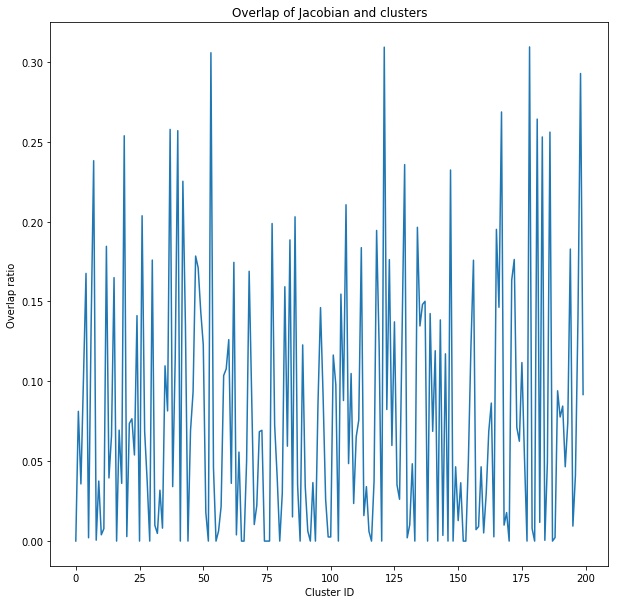

In [118]:
# Visualizing rows of the dataframe

# Choosing the number of clusters to visualize
n = 200

# x vector is the cluster ID
x = range(n)
y = np.array(output_df.iloc[n-1, :n])

# Plotting the ratios
plt.plot(x, y)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Cluster ID")
plt.ylabel("Overlap ratio")
plt.title("Overlap of Jacobian and clusters")

# Setting the figure size
plt.rcParams["figure.figsize"] = (10,10)

# To load the display window
plt.show()

ID of the cluster with maximum overlap is:  36
The number of cluster voxels in this slice:  19


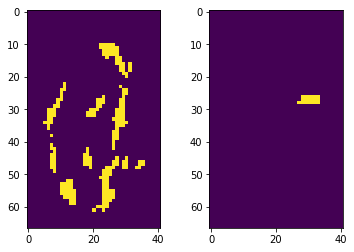

In [116]:
# Visualizing maximum overlapping cluster and Jacobian

# Choosing the number of clusters and cluster ID
n_clusters = 284
max_ID = np.argmax(output_df.iloc[n_clusters - 1])
print('ID of the cluster with maximum overlap is: ', max_ID)

# Loading the cluster
cluster_file = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(n_clusters)+'.nii'
cluster_arr = nifti_to_array(cluster_file)

# Masking the cluster for the specific cluster ID
masked_cluster = np.where(cluster_arr == max_ID, 1, 0)

# Loading the Jacobian
jac_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_pos_ctrst_clust_binary_200.nii'
jac_arr = nifti_to_array(jac_file)

# Visualizing the slices
slice_n = 27
jac_slice = jac_arr[:,slice_n,:]
cluster_slice = masked_cluster[:,slice_n,:]
print('The number of cluster voxels in this slice: ', np.sum(cluster_slice))

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(jac_slice)
ax2.imshow(cluster_slice)
plt.show()

In [ ]:
%%bash
module load afni/20.1.11
cd /data/bioprotean/RAG2/AVG/MWT_avg/to_allen/resample/
input='MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_pos_ctrst_clust_binary.nii'
master='nclusters_fixed10.nii'
3dresample \
    -master $master \
    -input $input \
    -prefix MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_pos_ctrst_clust_binary_200.nii